In [ ]:
from google.colab import files
file=files.upload()

Saving Stress.csv.zip to Stress.csv.zip


**Objective**

*   Stress detection is a challenging task, as there are so many words that can be used by people on their posts that can show whether a person is having psychological stress or not. look for datasets that you can use to train a machine learning model for stress detection.

The dataset contains data posted on subreddits related to mental health. This dataset contains various mental health problems shared by people about their life.




In [ ]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Data Reading
stress_c= pd.read_csv("Stress.csv.zip",compression='zip')

# Copy
stress=stress_c.copy()

# Data
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005




*   Subreddit - subreddit is a specific community or forum
*   post_id - unique_id

*   sentence_range - sentence index
*   text - text use for stress detection

*   label - 0 and 1 , 0 means no stress and 1 means stress

*   Confidence - confidence level of person on text
*   social_timestamp - 









In [ ]:
# Info
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [ ]:
# Checking null values
stress.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [ ]:
# Statistical Information
stress.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


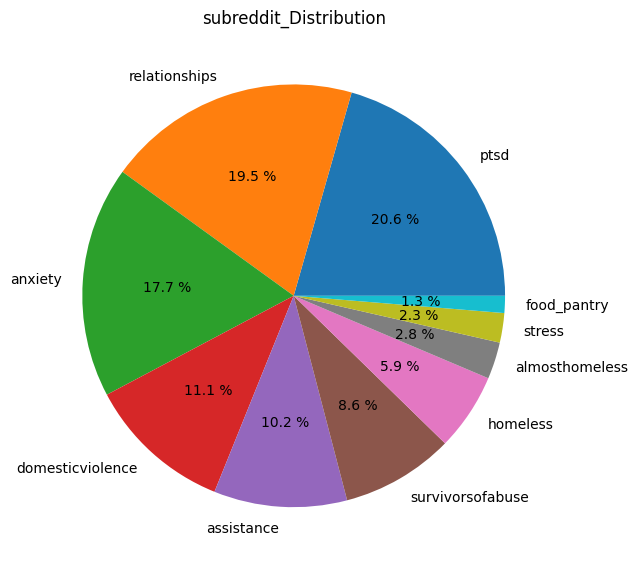

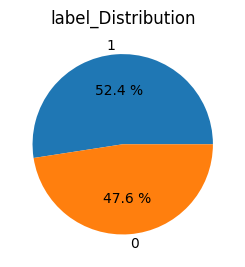

In [ ]:
# Visualizing Categorical Column Distribution
lst=['subreddit','label']
plt.figure(figsize=(15,12))
for i in range(len(lst)):
  plt.subplot(1,2,i+1)
  
  a=stress[lst[i]].value_counts()
  lbl=a.index
  plt.title(lst[i]+'_Distribution')
  plt.pie(x=a,labels=lbl,autopct="%.1f %%")
  plt.show()

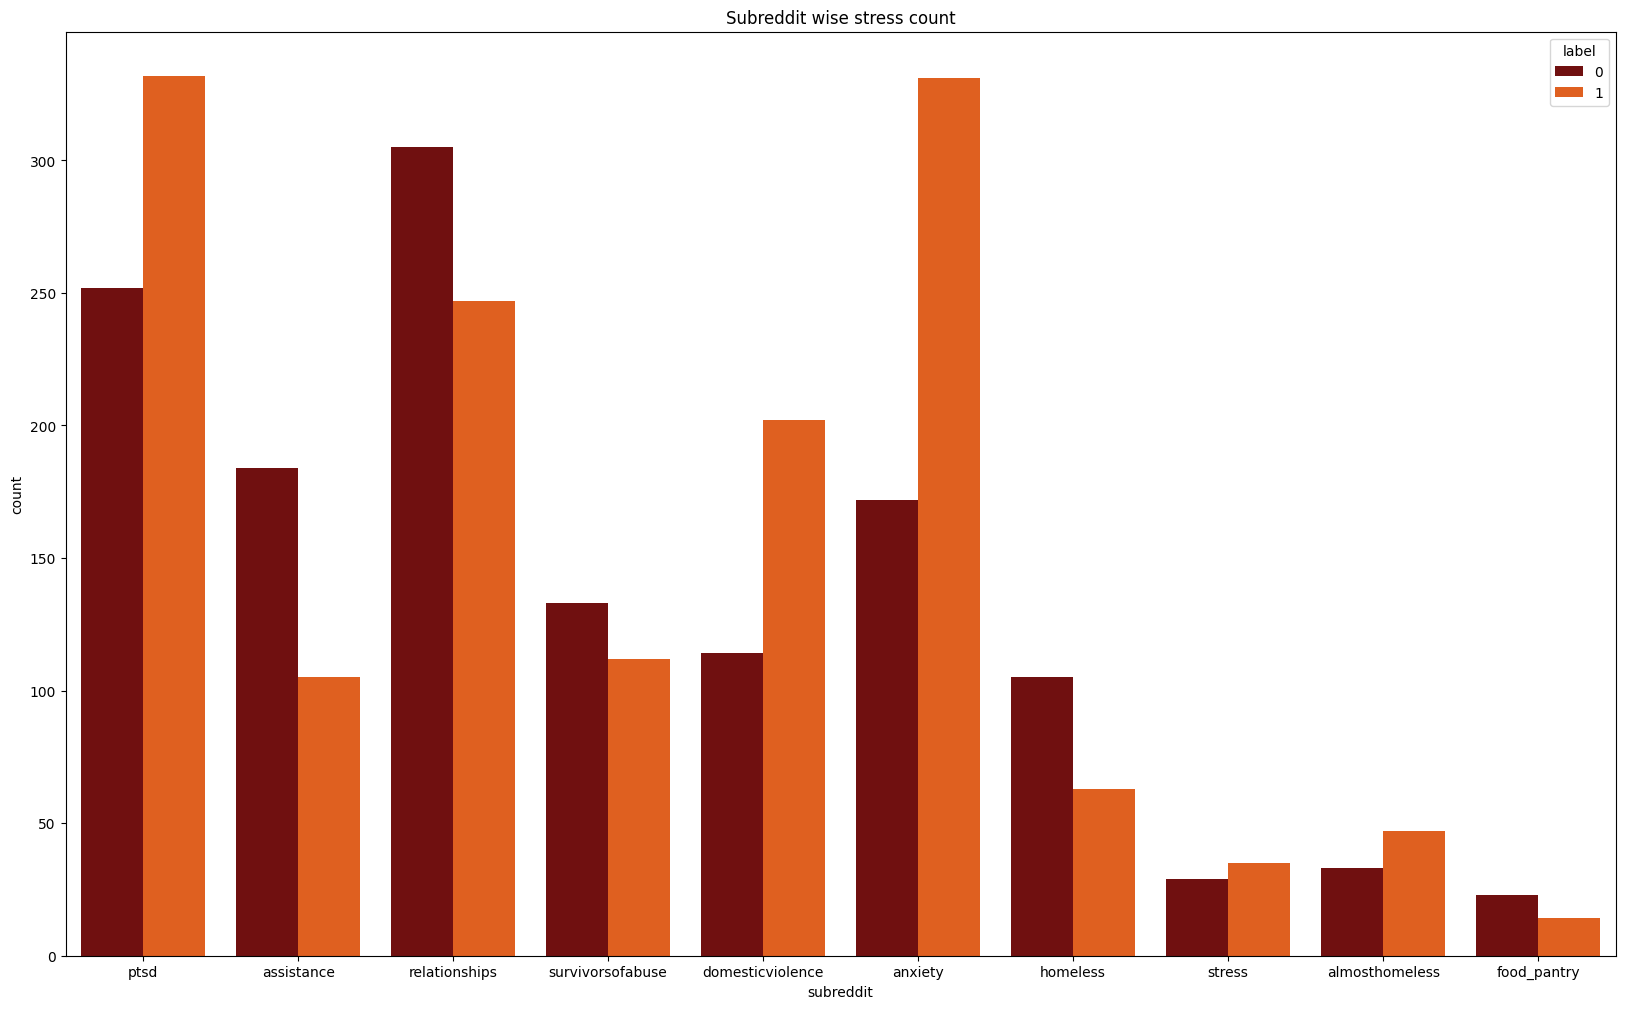

In [ ]:
# Subreddit Wise Stress Count 
plt.figure(figsize=(20,12))
plt.title('Subreddit wise stress count')
plt.xlabel('Subreddit')
sns.countplot(data=stress,x='subreddit',hue='label',palette='gist_heat')
plt.show()

- Anxiety & Domestic Violance is the major reason of human stress among all the subject

In [ ]:
# Regular Expression
import re 

# Handling string
import string

# NLP tool
import spacy

nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

# Importing Natural Language Tool Kit for NLP operations
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                #Multilingual Wordnet Data from OMW with newer Wordnet versions
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#defining function for preprocessing
def preprocess(text,remove_digits=True):
    text = re.sub('\W+',' ', text)                                        #for replacing non-word characters
    text = re.sub('\s+',' ', text)                                        #for replacng extra spaces
    text = re.sub("(?<!\w)\d+", "", text)                                 # Remove all numbers except those attached to a word
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)                           # Remove all hyphens except between two words
    text=text.lower()
    nopunc=[char for char in text if char not in string.punctuation]      #for removing punctuation in the strings
    nopunc=''.join(nopunc)
    
    
    return [word for word in nopunc.split() if word.lower() not in STOP_WORDS] #for removing stop words  # Defining a function for lemitization

# Defining a function for lemitization
def lemmatize_verbs(words):
   
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

#converting them into string
def listtostring(s):
  str1=' '
  return (str1.join(s))

def clean_text(input):
  word=preprocess(input)
  lemmas=lemmatize(word)
  return listtostring(lemmas)

In [ ]:
# Applying the function to clean the textual column
stress['clean_text']=stress['text'].apply(clean_text)
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,clean_text
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,say felt way suggeted rest trigger ahead youi ...
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,hey r assistance sure right place post go m cu...
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,mom hit newspaper shock know don t like play h...
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,meet new boyfriend amaze kind sweet good stude...
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,october domestic violence awareness month dome...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [ ]:
# Determining the feature and target for the model building
x=stress['clean_text']  # Feature
y=stress['label']       # Target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Logistic regression

def model_lr_tf(x_train, x_test, y_train, y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    
 
    ovr = LogisticRegression()
    
    #fitting training data into the model & predicting
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf=accuracy_score(y_test,y_pred)
    f1_lr_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy: ',acc_lr_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by MultinomialNB

def model_nb_tf(x_train, x_test, y_train, y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    

    ovr = MultinomialNB()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf=accuracy_score(y_test,y_pred)
    f1_nb_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Decision Tree
def model_dt_tf(x_train, x_test, y_train, y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    

    ovr = DecisionTreeClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf=accuracy_score(y_test,y_pred)
    f1_dt_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by KNN

def model_knn_tf(x_train, x_test, y_train, y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    

    ovr = KNeighborsClassifier()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf=accuracy_score(y_test,y_pred)
    f1_knn_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Random Forest

def model_rf_tf(x_train, x_test, y_train, y_test):
    global acc_rf_tf,f1_rf_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    

    ovr = RandomForestClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_rf_tf=accuracy_score(y_test,y_pred)
    f1_rf_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_rf_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Adaptive Boosting

def model_ab_tf(x_train, x_test, y_train, y_test):
    global acc_ab_tf,f1_ab_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    
    ovr = AdaBoostClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_ab_tf=accuracy_score(y_test,y_pred)
    f1_ab_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_ab_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    

In [ ]:
# Evaluating Models

print('********************Logistic Regression*********************')
print('\n')
model_lr_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Multinomial NB*********************')
print('\n')
model_nb_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Decision Tree*********************')
print('\n')
model_dt_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************KNN*********************')
print('\n')
model_knn_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Random Forest Bagging*********************')
print('\n')
model_rf_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Adaptive Boosting*********************')
print('\n')
model_ab_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')

********************Logistic Regression*********************


Time : 0.03355550765991211
Accuracy:  0.7488262910798122
Confusion Matrix: 
 [[290 104]
 [110 348]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       394
           1       0.77      0.76      0.76       458

    accuracy                           0.75       852
   macro avg       0.75      0.75      0.75       852
weighted avg       0.75      0.75      0.75       852





********************Multinomial NB*********************


Time :  0.006540775299072266
Accuracy:  0.710093896713615
Confusion Matrix: 
 [[185 209]
 [ 38 420]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.47      0.60       394
           1       0.67      0.92      0.77       458

    accuracy                           0.71       852
   macro avg       0.75      0.69      0.69       852
weighted avg       0.74  

In [ ]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','Multinomial NB','Decision Tree','KNN','Random Forest','Adaptive Boosting'])
tbl['Accuracy']=pd.Series([acc_lr_tf,acc_nb_tf,acc_dt_tf,acc_knn_tf,acc_rf_tf,acc_ab_tf])
tbl['F1_Score']=pd.Series([f1_lr_tf,f1_nb_tf,f1_dt_tf,f1_knn_tf,f1_rf_tf,f1_ab_tf])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.748826,0.748947
Multinomial NB,0.710094,0.692724
Decision Tree,0.612676,0.613087
KNN,0.645540,0.643891
Random Forest,0.713615,0.710765
Adaptive Boosting,0.690141,0.690536


In [ ]:
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score',ascending=False)
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.748826,0.748947
Multinomial NB,0.710094,0.692724
Decision Tree,0.612676,0.613087
KNN,0.645540,0.643891
Random Forest,0.713615,0.710765
Adaptive Boosting,0.690141,0.690536



 LogisticRegression()
f1-Score(train): mean= (0.743), min=(0.720)) ,max= (0.801), stdev= (0.030)
f1-Score(test): 0.7431

 MultinomialNB()
f1-Score(train): mean= (0.669), min=(0.619)) ,max= (0.719), stdev= (0.035)
f1-Score(test): 0.6698

 DecisionTreeClassifier(random_state=1)
f1-Score(train): mean= (0.622), min=(0.586)) ,max= (0.665), stdev= (0.026)
f1-Score(test): 0.6223

 KNeighborsClassifier()
f1-Score(train): mean= (0.630), min=(0.607)) ,max= (0.670), stdev= (0.024)
f1-Score(test): 0.6333

 RandomForestClassifier(random_state=1)
f1-Score(train): mean= (0.704), min=(0.655)) ,max= (0.739), stdev= (0.028)
f1-Score(test): 0.7039

 AdaBoostClassifier(random_state=1)
f1-Score(train): mean= (0.679), min=(0.661)) ,max= (0.713), stdev= (0.019)
f1-Score(test): 0.6789


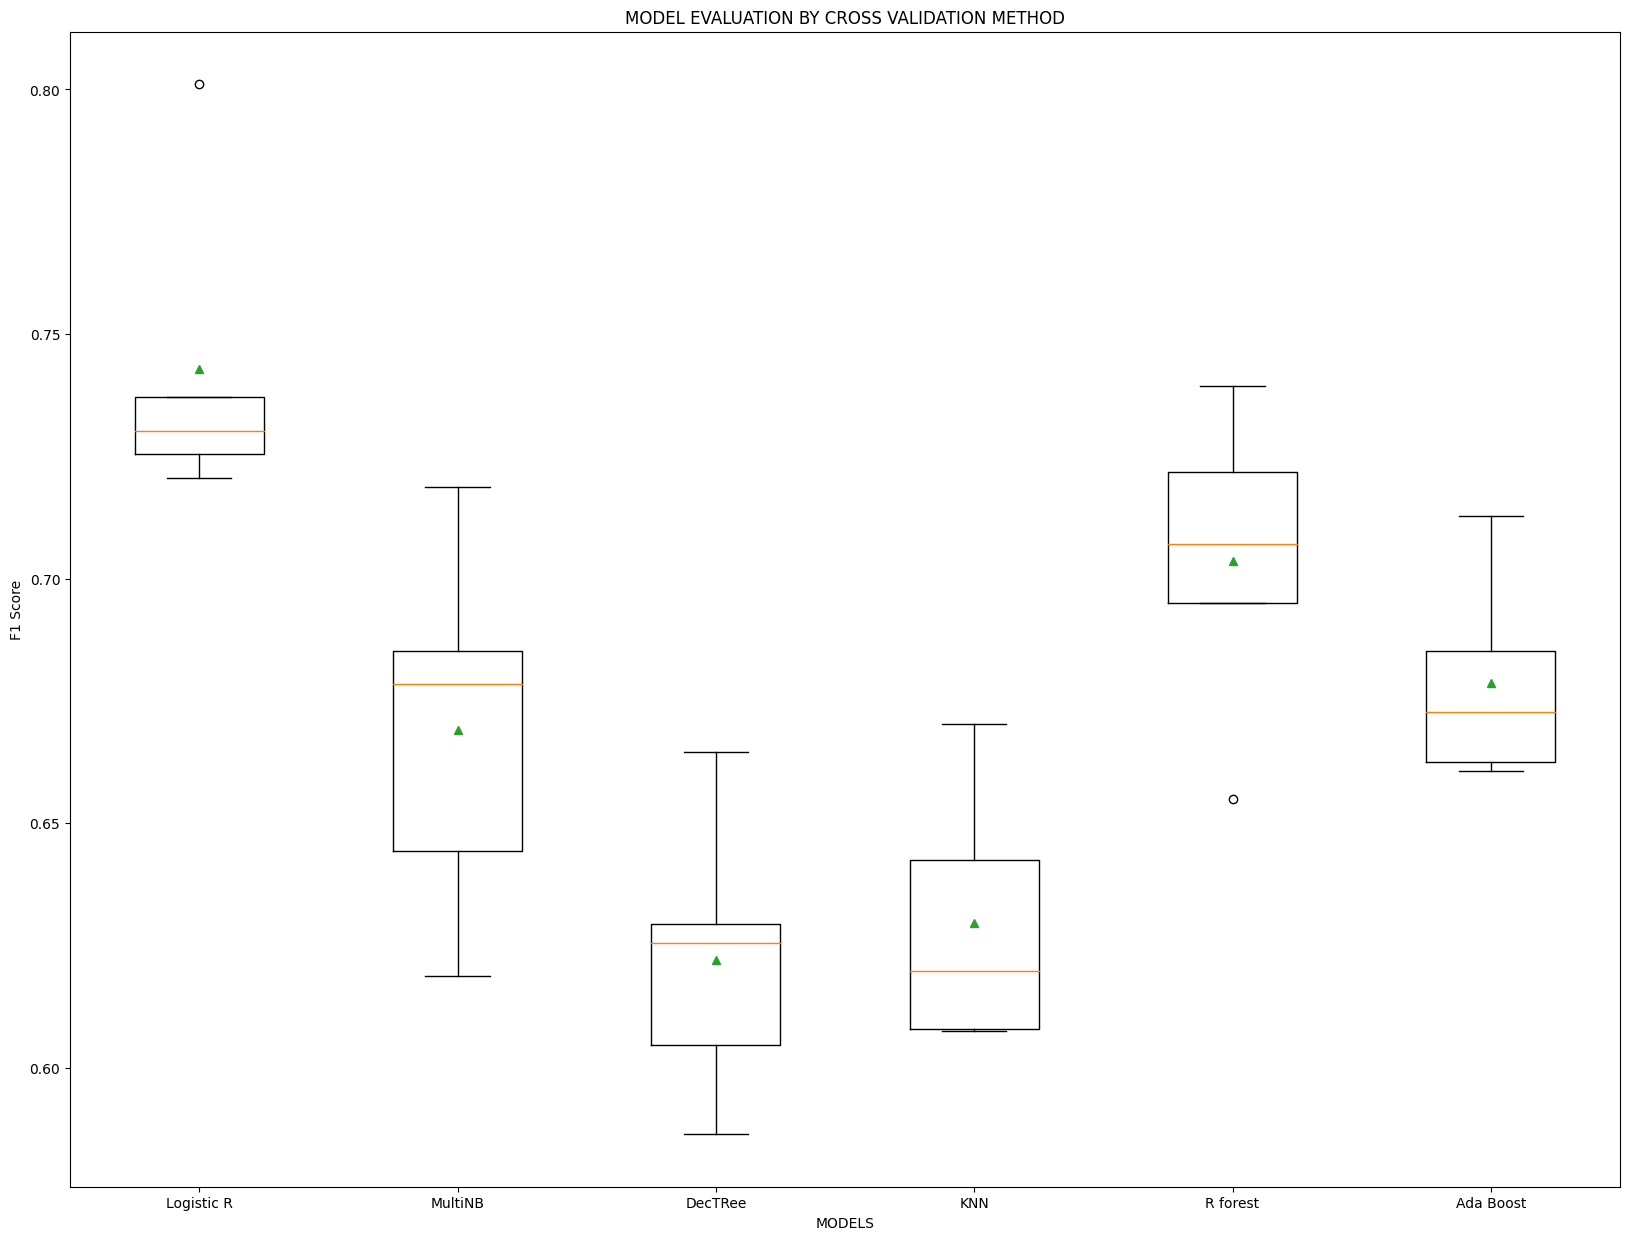

In [ ]:
# Using cross validation method to avoid overfitting
import statistics as st
vector = TfidfVectorizer()

x_train_v = vector.fit_transform(x_train)
x_test_v  = vector.transform(x_test)
###############################################################################
# Model building
lr =LogisticRegression()
mnb=MultinomialNB()
dct=DecisionTreeClassifier(random_state=1)
knn=KNeighborsClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
m  =[lr,mnb,dct,knn,rf,ab]
model_name=['Logistic R','MultiNB','DecTRee','KNN','R forest','Ada Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()

################################################################################
#Model fitting,cross-validating and evaluating performance

def algor(model):
  print('\n',i)
  pipe=Pipeline([('model',model)])
  pipe.fit(x_train_v,y_train)
  cv=StratifiedKFold(n_splits=5)
  n_scores=cross_val_score(pipe,x_train_v,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise') # As it is an Imbalance data so f1 score will give a better accuracy than normal accuracy.
  results.append(n_scores)
  mean_results.append(st.mean(n_scores))
  print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f), stdev= (%.3f)'%(st.mean(n_scores), min(n_scores), max(n_scores),np.std(n_scores)))
  y_pred=cross_val_predict(model,x_train_v,y_train,cv=cv)
  p.append(y_pred)
  f1=f1_score(y_train,y_pred, average = 'weighted')
  f1_test.append(f1)
  print('f1-Score(test): %.4f'%(f1))

for i in m:
  algor(i)

###############################################################################
# Model comparison By Visualizing 

fig=plt.subplots(figsize=(20,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()
     

- From the above diagram and cross validation results we can say that Logistic Regression model performs best on the dataset. So we are going to predict the stress by this model

In [ ]:
# Best Model For Prediction
x=stress['clean_text']
y=stress['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)
model_lr_tf=LogisticRegression()

model_lr_tf.fit(x_train,y_train)
y_pred=model_lr_tf.predict(x_test)
# Model Evaluation
    
conf=confusion_matrix(y_test,y_pred)
acc_lr=accuracy_score(y_test,y_pred)
f1_lr=f1_score(y_test,y_pred,average='weighted')

print('Accuracy: ',acc_lr)
print('F1 Score: ',f1_lr)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.7488262910798122
F1 Score:  0.7489472649369056
Confusion Matrix: 
 [[290 104]
 [110 348]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       394
           1       0.77      0.76      0.76       458

    accuracy                           0.75       852
   macro avg       0.75      0.75      0.75       852
weighted avg       0.75      0.75      0.75       852



In [ ]:
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,clean_text
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,say felt way suggeted rest trigger ahead youi ...
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,hey r assistance sure right place post go m cu...
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,mom hit newspaper shock know don t like play h...
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,meet new boyfriend amaze kind sweet good stude...
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,october domestic violence awareness month dome...


- Wordclouds to find out most stressful & non-stressfull words

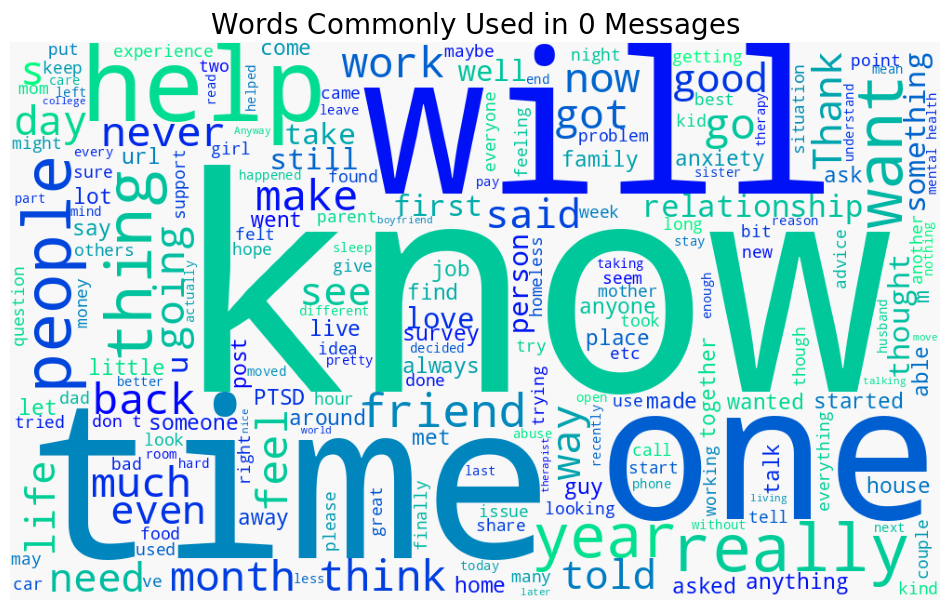

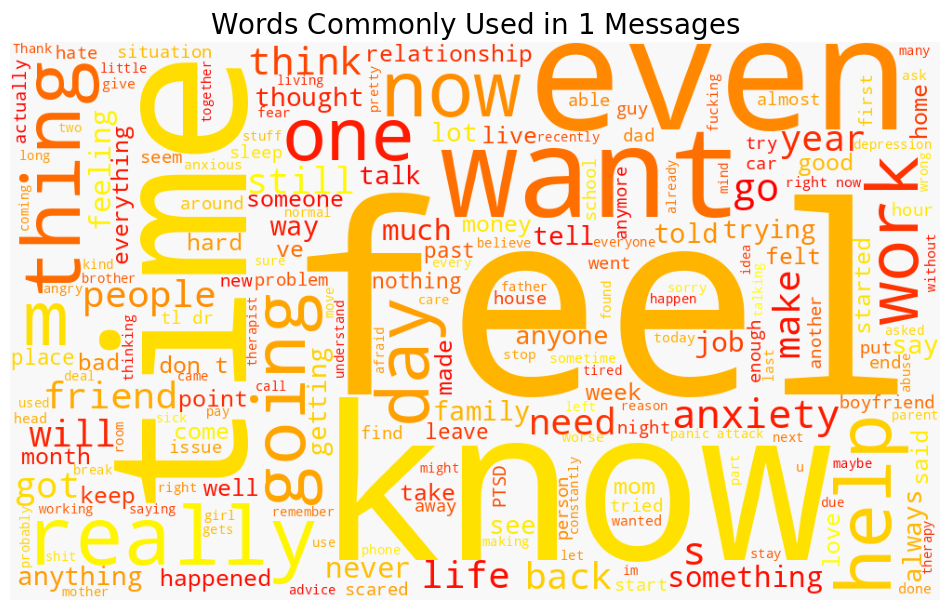

In [ ]:
for label, cmap in zip([0,1],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = stress.query('label == @label')['text'].str.cat(sep=' ')
    plt.figure(figsize=(12, 9))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [ ]:
# Prediction on random data
data=["""I don't have the ability to cope with it anymore. I'm trying, but a lot of things are triggering me, 
and I'm shutting down at work, just finding the place I feel safest, and staying there for an hour or two until 
I feel like I can do something again. I'm tired of watching my back, tired of traveling to places I don't feel safe, 
tired of reliving that moment, tired of being triggered, tired of the stress, tired of anxiety and knots in my stomach, 
tired of irrational thought when triggered, tired of irrational paranoia. I'm exhausted and need a break, but know it won't be 
enough until I journey the long road through therapy. I'm not suicidal at all, just wishing this pain and misery would end, to have my life back again."""]
data=vector.transform(data)
model_lr_tf.predict(data)

array([1])

- Our Model Predicted the above statement as Stressfull Statement which is actually Stressfull.

In [ ]:
# Prediction on random data
data=["""In case this is the first time you're reading this post... We are looking for people who are willing 
to complete some online questionnaires about employment and well-being which we hope will help us to improve services 
for assisting people with mental health difficulties to obtain and retain employment. We are developing an employment 
questionnaire for people with personality disorders; however we are looking for people from all backgrounds to complete it. 
That means you do not need to have a diagnosis of personality disorder – you just need to have an interest in completing the 
online questionnaires. The questionnaires will only take about 10 minutes to complete online. For your participation, we’ll 
donate £1 on your behalf to a mental health charity (Young Minds: Child & Adolescent Mental Health, Mental Health Foundation, or Rethink)"""]
data=vector.transform(data)
model_lr_tf.predict(data)

array([0])

-  Our Model Predicted the above statement as Non-Stressfull Statement which is actually Non-Stressfull.